<a href="https://colab.research.google.com/github/lcbjrrr/lcbjrrr/blob/master/AP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/lcbjrrr/master/Basedados_programacao%20-%20XL.csv')
dados

,Ano,mes,Empresa (nome),Empresa (sigla),Empresa (pais),Natureza,Passageiros,carga e correio (kg)
0,2019,1,AIGLE AZUR,AAF,FRANÃ‡A,INTERNACIONAL,7169,126460
1,2019,1,"AMERICAN AIRLINES,INC.",AAL,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,132819,3254526
2,2019,1,AIR CANADA,ACA,CANADÃ,INTERNACIONAL,25586,460667
3,2019,1,AIR EUROPA LINEAS AEREAS SOCIEDAD ANONIMA,AEA,ESPANHA,INTERNACIONAL,25011,594884
4,2019,1,SOCIÃ‰TÃ‰ AIR FRANCE,AFR,FRANÃ‡A,INTERNACIONAL,64770,1676283
...,...,...,...,...,...,...,...,...
1654,2020,12,EMIRATES,UAE,EMIRADOS ÃRABES UNIDOS,INTERNACIONAL,7860,2525779
1655,2020,12,"UNITED AIRLINES,INC",UAL,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,20990,2301634
1656,2020,12,UKRAINE AIR ALLIANCE AIRLINES,UKL,UCRÃ‚NIA,INTERNACIONAL,0,14168
1657,2020,12,UPS - UNITED PARCEL SERVICE CO.,UPS,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,0,2031978


In [ ]:
display(dados.dtypes)
display(dados.head())

Ano                      int64
mes                      int64
Empresa (nome)          object
Empresa (sigla)         object
Empresa (pais)          object
Natureza                object
Passageiros              int64
carga e correio (kg)     int64
dtype: object

,Ano,mes,Empresa (nome),Empresa (sigla),Empresa (pais),Natureza,Passageiros,carga e correio (kg)
0,2019,1,AIGLE AZUR,AAF,FRANÃ‡A,INTERNACIONAL,7169,126460
1,2019,1,"AMERICAN AIRLINES,INC.",AAL,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,132819,3254526
2,2019,1,AIR CANADA,ACA,CANADÃ,INTERNACIONAL,25586,460667
3,2019,1,AIR EUROPA LINEAS AEREAS SOCIEDAD ANONIMA,AEA,ESPANHA,INTERNACIONAL,25011,594884
4,2019,1,SOCIÃ‰TÃ‰ AIR FRANCE,AFR,FRANÃ‡A,INTERNACIONAL,64770,1676283


In [ ]:
dados.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Ano                   1659 non-null   int64 
 1   mes                   1659 non-null   int64 
 2   Empresa (nome)        1659 non-null   object
 3   Empresa (sigla)       1659 non-null   object
 4   Empresa (pais)        1659 non-null   object
 5   Natureza              1659 non-null   object
 6   Passageiros           1659 non-null   int64 
 7   carga e correio (kg)  1659 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 103.8+ KB
________________________________________


ETAPA SUMARIZAÇÃO

Na primeira sumarização foi feito um agrupamento dos dados da quantidade de passageiros transportados a cada mês.

In [ ]:
somapassa = dados.groupby('mes').sum()['Passageiros']
somapassa

mes
1     22874692
2     19022467
3     16025770
4      9652948
5      9627358
6      9846051
7     12462273
8     12252752
9     12923151
10    14550694
11    14930660
12    17003486
Name: Passageiros, dtype: int64

Nessa sumarização foi feito o agrupamento da Natureza, sendo separado em Internacional e Doméstico, sendo somado todos as vezes que essas variáveis aparecem.

In [ ]:
dados.groupby('Natureza').size()

Natureza
DOMÃ‰STICA        268
INTERNACIONAL    1391
dtype: int64

In [ ]:
len(dados[dados.Natureza=='INTERNACIONAL'])

1391

In [ ]:
len(dados[dados.Natureza=='DOMÃ‰STICA'])

268

In [ ]:
da = pd.Series({'INTERNACIONAL':1389,'DOMÃ‰STICA':268})
df1 = pd.DataFrame([da])
df1

,INTERNACIONAL,DOMÃ‰STICA
0,1389,268


Nessa sumarização foi agrupado o Ano, sendo somado o de 2019 e 2020, sendo somado todos as vezes que essas variáveis aparecem.

In [ ]:
dados.groupby('Ano').size()

Ano
2019    880
2020    779
dtype: int64

In [ ]:
da = pd.Series({'2019':880,'2020':779})
df2 = pd.DataFrame([da])
df2

,2019,2020
0,880,779


ETAPA VIZUALIZACAO (AV1)

Nesse processo foi descoberto o maior número de passageiros transportados durante os períodos selecionados da base de dados, sendo a frequência de 3419558 passageiros durante um mês por uma companhia aérea, provavelmente operado por uma empresa nacional em voos nacionais.

In [ ]:
dados.Passageiros
max1 = max(dados.Passageiros)
max1

3419558.0

Nesse processo foi descoberto o menor número de passageiro transportado durante os períodos selecionados da base de dados, sendo a frequência de 0 passageiro durante um mês por uma companhia aérea, provavelmente sendo esse o número de uma empresa cargueira.

In [ ]:
dados.Passageiros
min1 = min(dados.Passageiros)
min1

0

Nesse processo foi descoberto a média de passageiros transportados durante os períodos selecionados da base de dados, sendo a frequência aproximada de 103364.91 passageiros.

In [ ]:
dados['Passageiros'].mean()

103364.91666666667

ETAPA VISUALIZACAO (AV2)


Nessa análise foi feita um gráfico de barras, utilizando da soma da frequência de passageiros de cada mês dos dois anos. Percebe-se que durante o mês de abril à junho, o movimento é menor, devido ao início da pandemia, momento em que os aeroportos ficaram fechados. já nos meses de dezembro, janeiro e fevereiro a movimentação foi maior, devido as férias que aumentam significativamente a movimentação do mercado aéreo.

mes
1     22874692
2     19022467
3     16025770
4      9652948
5      9627358
6      9846051
7     12462273
8     12252752
9     12923151
10    14550694
11    14930660
12    17003486
Name: Passageiros, dtype: int64


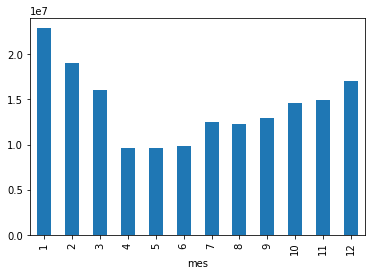

In [ ]:
print(somapassa)
somapassa.plot(kind='bar')

Nessa análise foi utilizado o gráfico de pizza para analizar a quantidade de vezes em que uma companhia aérea operou no Brasil. Sendo comparado essa quantidade de 2019 e 2020. É possível perceber que em 2019 teve maior frequência de operações comparado a 2020. Essa diferença se deve ao fato de em 2020 o mercado aéreo ser atingido pelo Covid-19, diminuindo a frequência dos voos.

Ano
2019    880
2020    779
Name: mes, dtype: int64


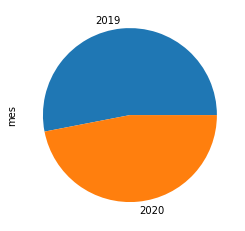

In [ ]:
pizzano = dados.groupby('Ano').count()['mes']
print(pizzano)
pizzano.plot(kind='pie')

Nessa análise foi utilizado o gráfico de linha para analizar o movimento das caragas aéreas transportadas nos períodos de 2019 e 2020. É possível perceber que em 2019 teve maior quantidade de carga e com um fluxo constante comparado a 2020, ano em que há uma queda grande em abril, mês em que começou a pandemia no Brasil. Percebe-se que a partir de maio começa a ter um aumento, porém ainda lentamente, somente em outubro voltando a patamares de 2019.

Ano   mes
2019  1      100116696
      2      102999411
      3      111781582
      4      108824078
      5      109820871
      6      100389282
      7      103355567
      8      104784514
      9      102100072
      10     112755971
      11     114373785
      12     109232764
2020  1       98340240
      2      101082025
      3       97990195
      4       56432915
      5       66083123
      6       69356028
      7       76036882
      8       81770667
      9       87314320
      10     100629094
      11     103705246
      12     107774320
Name: carga e correio (kg), dtype: int64


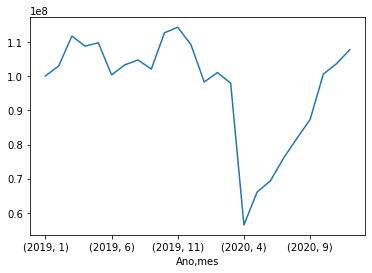

In [ ]:
freq = dados.groupby(['Ano', 'mes']).sum()['carga e correio (kg)']
print(freq)
freq.plot()

ETAPA ESTATÍSTICA

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 141 missing from current font.
  font.set_text(s, 0, flags=flags)


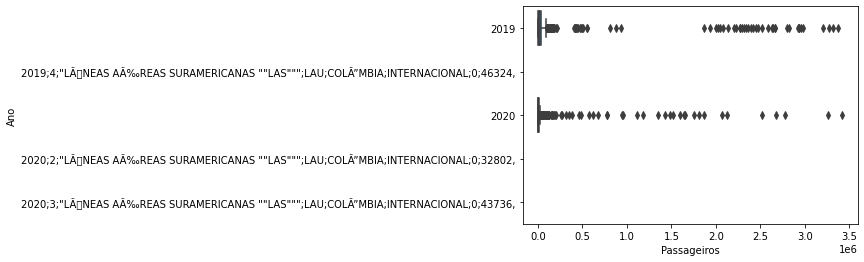

In [ ]:
import seaborn as sns
sns.boxplot(data=dados,x="Passageiros",y='Ano')

In [ ]:
dadosx = dados[dados['Passageiros']<300]
dadosx

,Ano,MÃªs,Empresa (nome),Empresa (sigla),Empresa (pais),Natureza,Passageiros,"carga e correio (kg),"
5,2019,1.0,AMERISTAR AIR CARGO,AJI,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,23.0,0
16,2019,1.0,TRANSPORTES AEREOS BOLIVIANOS,BOL,BOLÃVIA,INTERNACIONAL,0.0,60138
20,2019,1.0,CARGOLUX AIRLINES INTERNATIONAL S/A,CLX,LUXEMBURGO,INTERNACIONAL,0.0,3628227
26,2019,1.0,DIVI DIVI AIR,DVR,CURAÃ‡AO,INTERNACIONAL,213.0,0
29,2019,1.0,FEDEX - FEDERAL EXPRESS CORPORATION,FDX,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,0.0,1037784
...,...,...,...,...,...,...,...,...
1653,2020,12.0,TAMPA CARGO S.A.,TPA,COLÃ”MBIA,INTERNACIONAL,0.0,2465279
1654,2020,12.0,TOTAL LINHAS AÃ‰REAS S.A.,TTL,BRASIL,DOMÃ‰STICA,0.0,1723736
1657,2020,12.0,UKRAINE AIR ALLIANCE AIRLINES,UKL,UCRÃ‚NIA,INTERNACIONAL,0.0,14168
1658,2020,12.0,UPS - UNITED PARCEL SERVICE CO.,UPS,ESTADOS UNIDOS DA AMÃ‰RICA,INTERNACIONAL,0.0,2031978


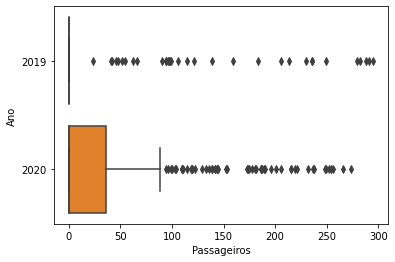

In [ ]:
sns.boxplot(data=dadosx,x="Passageiros",y='Ano')